Import libraries

In [28]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')
from utils import get_key_points, get_homography

Get homography from key frames to rink

In [ ]:
# path to key frames
path = './key_frames/'

# for each key frame file in key_frames
for file in os.listdir(path):

    # Get key points from key frame
    key_frame_points = get_key_points(path + file, file)
    
    # Get get points from rink
    geo_model_points = get_key_points('../geometric_model/rink.png', 'rink')
    
    # Compute homography between key points and rink
    M = get_homography(key_frame_points, geo_model_points, file)

Plot homography transformation of key frame

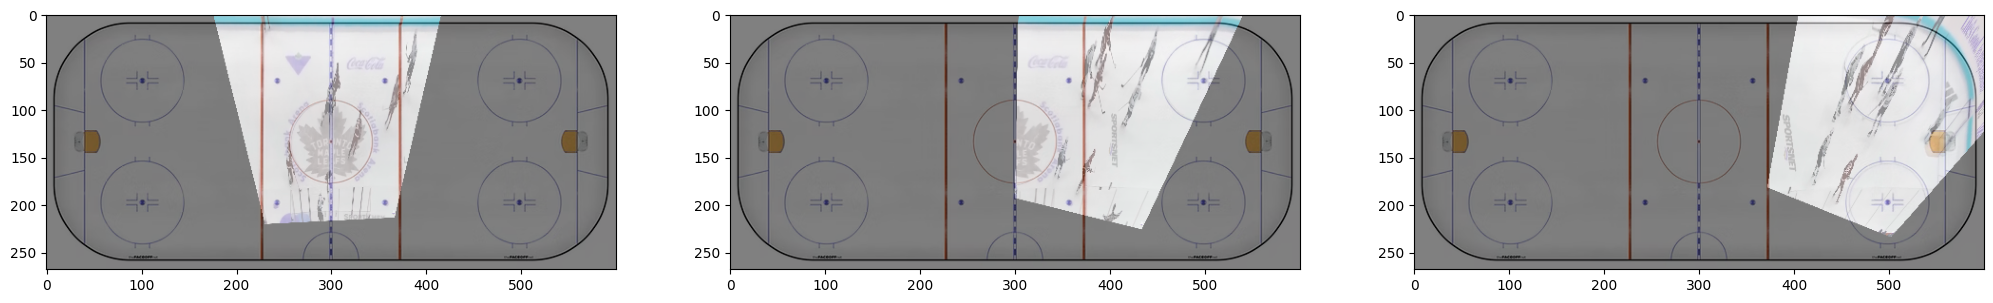

In [31]:
# plot homography transformation
path = './key_frames/'
files = os.listdir(path)
rink = cv2.imread('../geometric_model/rink.png')

# Plot images in loop
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(25.0, 20.0)
for i in range(len(files)):

    # Load keyframe and corresponding homography
    fileName = files[i]
    M = np.load(f'{fileName[:-4]}.npy')
    img = cv2.imread(path + fileName)

    # Wrap image and plot result
    result = cv2.warpPerspective(img, M, (rink.shape[1], rink.shape[0]))
    axes[i].imshow(rink)
    axes[i].imshow(result, alpha = 0.5)

Get homography from first frame to first key frame

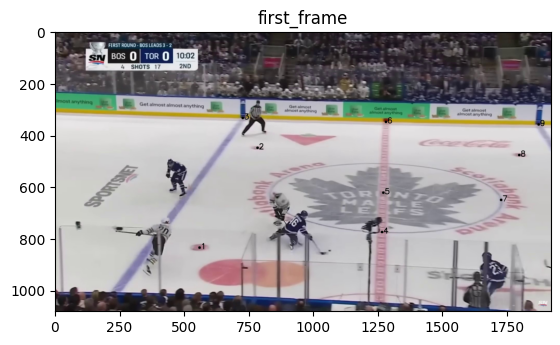

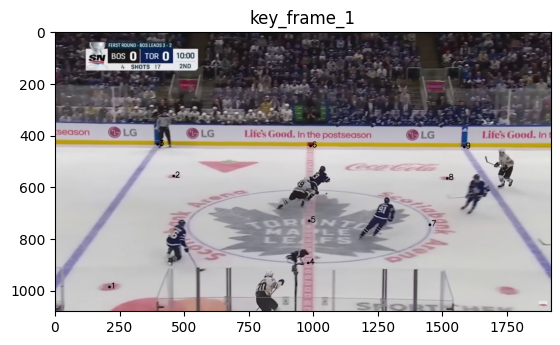

In [ ]:
# Get first frame key points
first_frame_points = get_key_points('../../outputs/raw_frames/frame_0000.jpg', 'first_frame')
# Get last frame key points
key_model_points = get_key_points('./key_frames/key_frame_1.jpg', 'key_frame_1')
# COmpute homography between selected keypoints
M = get_homography(first_frame_points, key_model_points, 'first_frame')

Plot homography transformation from first frame to key frame

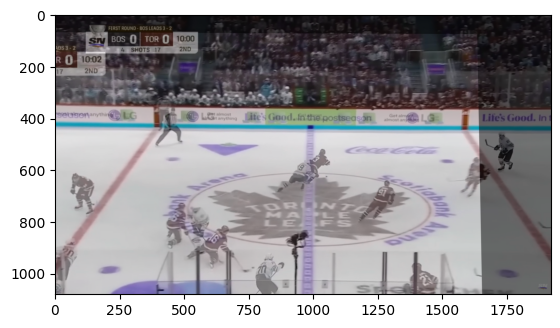

In [33]:
# load keyframe and corresponding homography
key_frame = cv2.imread('./key_frames/key_frame_1.jpg')
M = np.load('first_frame.npy')

# load first_frame and warp to match keyframe 
img = cv2.imread('../../outputs/raw_frames/frame_0000.jpg')
result = cv2.warpPerspective(img, M, (key_frame.shape[1], key_frame.shape[0]))

# Plot result
plt.imshow(key_frame)
plt.imshow(result, alpha = 0.5)
plt.show()